In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [229]:
sns.set(rc={"figure.figsize":(10, 6)})

# Data Cleaning

In [230]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Sentimental Classification/sentimental.csv")

In [231]:
data.sample(10)

,Data,Label
981,"अरे रुटिने खोसे जस्तो देखियो है, अर्को फोटो रा...",2
35,उहाँसँग यो फोनको तुलनामा ठूलो स्क्रिन छ,2
1638,म पनि अब गएर गाउको फोहोर भेला पारेर फोटो खिचेर...,1
1785,तर जनता सडक मा उत्रेर दबाब दिय जस्ले यो भयेको ...,2
1303,अरु कुरा कुन कुन कुरा चाहिँ ब्यान गर्छौ हे डाम...,2
432,असली मायामा कचेरा पुछ्दै भिडियोकल गरिन्छ,2
838,किनिएको समानहरुमा निकै नै खराबी देखियो र निकै ...,0
93,ramro layo,1
1882,kt mathi chadnu aghi ali kati buddhi lagako bhaya,1
296,बल्ल राजनीति पार्टी हरुको आँखा खुल्दैछ,1


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2189 non-null   object
 1   Label   2178 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


In [233]:
data[data.isnull().any(axis=1)]

,Data,Label
62,आकार मनपर्छ,NaN
475,Huge congratulation,NaN
796,यहाँको उत्पादहरूसँग सन्तुष्टि हुदैन,NaN
1083,लुट्न सक्य लुट्,NaN
1441,शहर को बेथा गाउ मा के,NaN
1695,दसै कसरी आउछ् ?2,NaN
1715,के को खत हो ?,NaN
2052,,NaN
2064,,NaN
2080,आफुले सहयोग गर्नु परै जाओस् उल्टै राम्रो काम ह...,NaN


In [234]:
data.columns

Index(['Data ', 'Label'], dtype='object')

In [235]:
data.rename(columns = {"Data " : "Data"}, inplace = True)

In [236]:
data.at[62, "Data"]

'आकार मनपर्छ'

In [237]:
data.at[62, "Label"]

nan

In [238]:
update_list = [(475, 1), (796, 0), (1083, 0), (1441, 2), (1695, 2), (1715, 2), (2080, 0), (2083, 1)]

In [239]:
def update_label_for_nan_values(data, update_list):
  for index, label in update_list:
    data.at[index, "Label"] = label

In [240]:
update_label_for_nan_values(data, update_list)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2189 non-null   object
 1   Label   2186 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


### Check if there are any null values left

In [242]:
data[data.isnull().any(axis=1)]

,Data,Label
62,आकार मनपर्छ,NaN
2052,,NaN
2064,,NaN


In [243]:
# drop all the null values
data.dropna(axis = 0, inplace = True)

In [244]:
data[data.isnull().any(axis=1)]

,Data,Label


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2186 non-null   object
 1   Label   2186 non-null   object
dtypes: object(2)
memory usage: 51.2+ KB


# Exploratory Data Analysis and Visualization

In [246]:
print(f"There are {data.Label.nunique()} types of emotion")

There are 9 types of emotion


In [247]:
data.sample(10)

,Data,Label
505,टमाटर मँहगो भयो भनेर फेसबूकमा गफ,1
388,सानो सानो,2
1099,युद्ध त तिमी र म बिच थियो तर सहिद हाम्रो माया ...,2
636,muslim and hindus live with tolerance since ma...,1
1678,यसलाई त हाडे बदाम भन्छन् हैन र ?,2
1436,सबैजनाले यो देख्ने बित्तिकै लब रियाक्ट वा लाईक...,1
1884,कामिरिता शेर्पा एक हप्तामा दुई दुई पटक सगरमाथा...,1
783,हार्दिक धन्यवाद,1
1272,सबै भन्दा झुटो बोल्ने गीत हो यो,0
1580,श्रीपेच खोसिदिएको पनि मन परेको थिएन,0


In [248]:
data["Label"] = data["Label"].astype(int)

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2186 non-null   object
 1   Label   2186 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.2+ KB


In [250]:
print(f"There are {data.Label.nunique()} types of emotion")

There are 3 types of emotion


Here, 
0 = Negative
1 = Positive
2 = Neutral

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


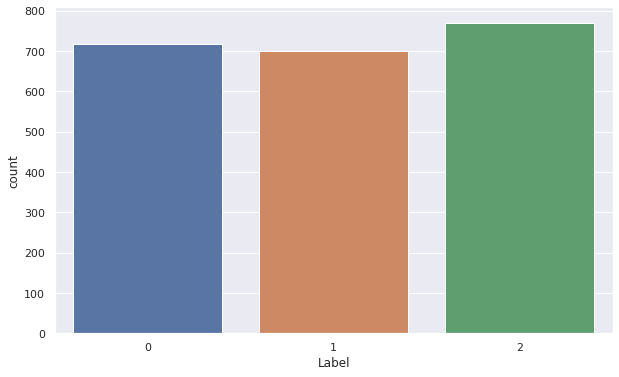

In [251]:
sns.countplot(data.Label)

In [252]:
data.Label.value_counts()

2    770
0    717
1    699
Name: Label, dtype: int64

# Text Preprocessing

*   Tokenize the words
*   Remove stopwords
*   stemming or lemmatization

In [253]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [255]:
words_to_be_removed = ["स्पष्ट", "राम्रो", "ठीक"]

In [256]:
nepali_stopwords = stopwords.words('nepali')

In [257]:
len(nepali_stopwords)

255

In [258]:
nepali_stopwords = [word for word in nepali_stopwords if word not in words_to_be_removed]

In [259]:
len(nepali_stopwords)

252

In [260]:
!pip install git+https://github.com/sushil79g/Nepali_nlp.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sushil79g/Nepali_nlp.git to /tmp/pip-req-build-hs91sqme
  Running command git clone -q https://github.com/sushil79g/Nepali_nlp.git /tmp/pip-req-build-hs91sqme


In [261]:
from Nepali_nlp import Stem
text = "सरकारका प्रवक्ता प्रदीप ज्ञवालीले पनि गत बिहीबार उनलाई अनशन तोड्न आग्रह गरेका थिए"
Stem().rootify(text)

['सरकार',
 'प्रवक्ता',
 'प्रदीप',
 'ज्ञवाली',
 'पनि',
 'गत',
 'बिहीबार',
 'उन',
 'अनशन',
 'तोड्न',
 'आग्रह',
 'गर',
 '']

In [262]:
text = ["आग्रह", "गरेका", "थिए"]
Stem().rootify(text)

['आग्रह', 'गर', '']

In [263]:
!pip install nepalitokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
from nepalitokenizer import NepaliTokenizer
tokenize = NepaliTokenizer()
print(tokenize.tokenizer('के छ खबर तिम्रो ? '))

['खबर', 'तिम्रो']


In [265]:
def text_preprocessing(text):
  # Tokenize the reviews
  text = tokenize.tokenizer(text)
  # Remove the nepali stopwords
  text = [word for word in text if word not in nepali_stopwords]
  # Stemming the nepali words
  text = Stem().rootify(text)
  text = ' '.join(text)
  # Remove the leading and trailing spaces
  text = text.split()
  text = ' '.join(text)
  
  return text

In [266]:
data.isnull().sum()

Data     0
Label    0
dtype: int64

In [267]:
data.Data[100]

'सडक मा भन्दा पहिले नेताको दिमाख मा ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास हुन्थ्यो कि'

In [268]:
text_preprocessing(data.Data[100])

'सडक नेता दिमाख ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास'

In [269]:
X = data["Data"].apply(text_preprocessing)
y = data["Label"]

In [270]:
X[100]

'सडक नेता दिमाख ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास'

In [271]:
print(len(X))
print(len(y))

2186
2186


# Train, Validation and Test Split

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)

In [273]:
print(f"Train size =  {len(X_train)}")
print(f"Validation size =  {len(X_val)}")
print(f"Test size =  {len(X_test)}")

Train size =  1748
Validation size =  219
Test size =  219


In [274]:
print(len(y_train), len(y_val), len(y_test))

1748 219 219


In [275]:
type(X_train)

pandas.core.series.Series

In [276]:
X_train.iloc[0]

'अाखिर देश विकासकाे बाधक काे'

In [277]:
y_train.iloc[0]

2

# Text Vectorization

### Get the count of each unique words to find out the maximum number of words for our vocabulary

In [278]:
from collections import Counter
def count_words(text):
  """
  Count unique words
  """
  count = Counter()
  for sentence in text:
    for word in sentence.split():
      count[word] += 1
  return count

In [279]:
counter = count_words(X_train)
counter = dict(counter)

for i, count in enumerate(counter.items()):
  print(count)
  if i > 5:
    break

('अाखिर', 1)
('देश', 82)
('विकासकाे', 3)
('बाधक', 5)
('काे', 3)
('बल्ल', 7)
('राजनीति', 4)


In [280]:
print(f"There are {len(counter)} unique words in the corpus")

There are 3163 unique words in the corpus


In [281]:
unique_words_count = 3179

### Get the statistics of length of sentences(no. of words in a sentence) to get the maximum padding length

In [282]:
def getLengthArray(text):
  length = []
  for sentence in text:
    length.append(len(sentence.split()))
  return length

In [283]:
length_arr = getLengthArray(X_train)
length_series = pd.Series(length_arr)
print(length_series.describe())

count    1748.000000
mean        4.633867
std         3.944787
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        64.000000
dtype: float64


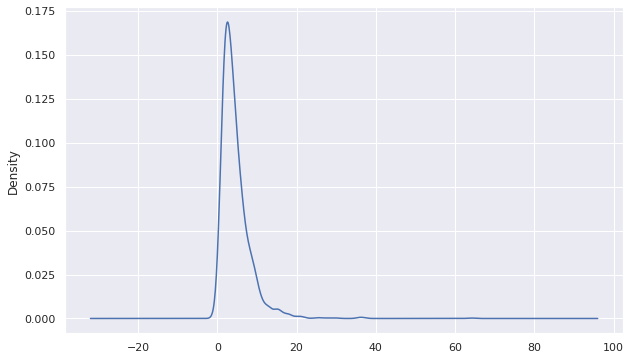

In [284]:
length_series.plot(kind = 'kde')

In [285]:
# From graph
maximum_padding_length = 10

### One Hot Encoding

In [286]:
# Tokenizer is used to give unique index value to each unique words (JUST LIKE IN ONE HOT ENCODING)
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = unique_words_count)
tokenizer.fit_on_texts(X_train)

In [287]:
word_index = tokenizer.word_index

for i, word in enumerate(word_index.items()):
  if i > 5:
    break
  print(word)

('देश', 1)
('नेपाल', 2)
('लाग्', 3)
('नेपाली', 4)
('जनता', 5)
('सफा', 6)


In [288]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = maximum_padding_length, padding = 'post', truncating = 'post')
print(train_padded[0])

[1907, 1, 520, 246, 521]
[1907    1  520  246  521    0    0    0    0    0]


In [289]:
val_sequences = tokenizer.texts_to_sequences(X_val)
print(val_sequences[0])
val_padded = pad_sequences(val_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
print(val_padded[0])

[751, 60, 38]
[751  60  38   0   0   0   0   0   0   0]


In [290]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
print(test_padded[0])

[14, 535, 2363, 395, 752, 2364]
[  14  535 2363  395  752 2364    0    0    0    0]


In [291]:
print(X_train.iloc[0])
print(train_sequences[0])

अाखिर देश विकासकाे बाधक काे
[1907, 1, 520, 246, 521]


In [292]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [293]:
def decode(text):
  return " ".join([reverse_word_index.get(i, "?") for i in  text])

In [294]:
decode(train_sequences[0])

'अाखिर देश विकासकाे बाधक काे'

In [295]:
print(f"Spape of train {train_padded.shape}")
print(f"Spape of validation {val_padded.shape}")
print(f"Spape of test {test_padded.shape}")

Spape of train (1748, 10)
Spape of validation (219, 10)
Spape of test (219, 10)


### Coding of Labels

In [296]:
y_train

2130    2
296     1
618     2
1625    1
1390    2
       ..
600     1
1600    0
1362    2
1548    1
864     0
Name: Label, Length: 1748, dtype: int64

In [299]:
y_train = pd.get_dummies(y_train).values

ValueError: ignored

In [302]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [301]:
y_val = pd.get_dummies(y_val).values
y_test = pd.get_dummies(y_test).values

In [306]:
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_val : {y_val.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of y_train : (1748, 3)
Shape of y_val : (219, 3)
Shape of y_test : (219, 3)


# Model Development

In [307]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            203456    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 215,971
Trainable params: 215,971
Non-trainable params: 0
_________________________________________________________________
None


In [324]:
def getModel():
  model = Sequential([
    Embedding(unique_words_count, output_dim = 64, input_length = maximum_padding_length),
    LSTM(32, dropout = 0.3),
    Dense(3, activation = 'softmax')
  ])

  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  print(model.summary())

  return model

def getVisualization(history):
  #plot the training and validation accuracy and losss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  acc = history.history['accuracy'] 
  val_acc = history.history['val_accuracy']
  plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
  plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()



In [325]:
model = getModel()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 64)            203456    
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 215,971
Trainable params: 215,971
Non-trainable params: 0
_________________________________________________________________
None


In [326]:
history = model.fit(train_padded, y_train, epochs = 15, batch_size = 32, validation_data = (val_padded, y_val))

Epoch 1/15
55/55 [==============================] - 4s 23ms/step - loss: 1.0974 - accuracy: 0.3633 - val_loss: 1.0946 - val_accuracy: 0.3699
Epoch 2/15
55/55 [==============================] - 1s 11ms/step - loss: 1.0031 - accuracy: 0.4920 - val_loss: 1.1136 - val_accuracy: 0.4292
Epoch 3/15
55/55 [==============================] - 1s 11ms/step - loss: 0.6879 - accuracy: 0.6974 - val_loss: 1.0200 - val_accuracy: 0.5936
Epoch 4/15
55/55 [==============================] - 1s 11ms/step - loss: 0.4148 - accuracy: 0.8444 - val_loss: 1.0875 - val_accuracy: 0.6347
Epoch 5/15
55/55 [==============================] - 1s 12ms/step - loss: 0.3050 - accuracy: 0.8867 - val_loss: 1.1942 - val_accuracy: 0.6347
Epoch 6/15
55/55 [==============================] - 1s 11ms/step - loss: 0.2232 - accuracy: 0.9211 - val_loss: 1.3249 - val_accuracy: 0.6438
Epoch 7/15
55/55 [==============================] - 1s 11ms/step - loss: 0.1914 - accuracy: 0.9348 - val_loss: 1.3355 - val_accuracy: 0.6301
Epoch 8/15
55

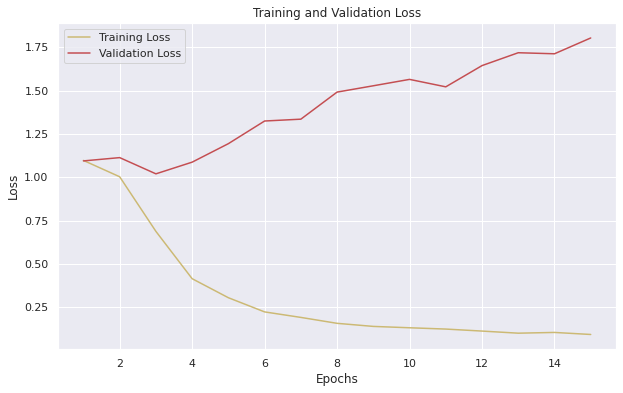

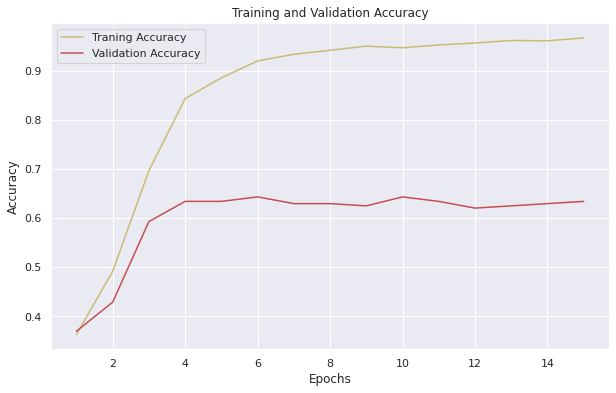

In [327]:
getVisualization(history)

# Test Data Evaluation

In [329]:
from sklearn.metrics import confusion_matrix

In [330]:
y_pred = model.predict(test_padded)

7/7 [==============================] - 0s 3ms/step


In [332]:
y_test[0:5]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [333]:
y_pred[0:5]

array([[9.8566335e-01, 9.5888376e-03, 4.7478895e-03],
       [2.3082930e-03, 1.2616556e-02, 9.8507506e-01],
       [9.9504906e-01, 1.9871148e-03, 2.9637956e-03],
       [4.4492606e-02, 8.7687325e-01, 7.8634195e-02],
       [9.9865526e-01, 4.6636112e-04, 8.7844825e-04]], dtype=float32)

In [341]:
y_pred_modified = []
for pred in y_pred:
  pred = list(pred)
  max_value = max(pred)
  max_index = pred.index(max_value)
  y_pred_modified.append(max_index)

In [344]:
y_test_modified = []
for arr in y_test:
  arr = list(arr)
  max_value = max(arr)
  max_index = arr.index(max_value)
  y_test_modified.append(max_index)

In [345]:
y_test_modified[0:5]

[0, 2, 2, 0, 2]

In [342]:
y_pred_modified[0:5]

[0, 2, 0, 1, 0]

[Text(66.5, 0.5, 'True'), Text(0.5, 30.5, 'Predicted')]

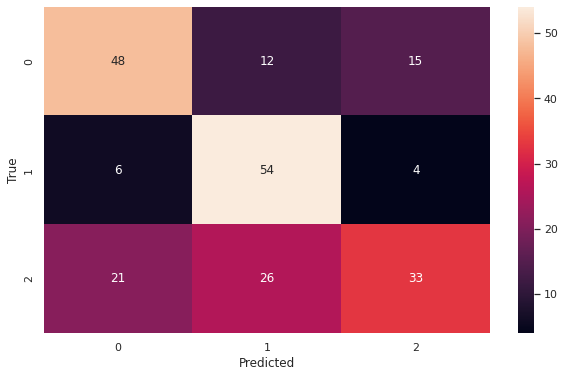

In [347]:
cm = confusion_matrix(y_true = y_test_modified, y_pred = y_pred_modified)
cm_heatmap = sns.heatmap(cm, annot = True)
cm_heatmap.set(xlabel = "Predicted", ylabel = "True")

In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test_modified, y_pred = y_pred_modified, target_names = ['Negative', 'Positive', 'Neutral']))

              precision    recall  f1-score   support

    Negative       0.64      0.64      0.64        75
    Positive       0.59      0.84      0.69        64
     Neutral       0.63      0.41      0.50        80

    accuracy                           0.62       219
   macro avg       0.62      0.63      0.61       219
weighted avg       0.62      0.62      0.60       219



# Own Data Test and Evaluation

In [351]:
!pip install nepali-unicode-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [367]:
from nepali_unicode_converter.convert import Converter

converter = Converter()
mystring = 'aahaa ! kati raamro. je hos gajaba ko rahexa'
own_string = converter.convert(mystring)
print(own_string)

आहा ! कति राम्रो। जे होस् गजब को रहेxअ


In [374]:
def testOwnString(own_string):
  own_string_list = [own_string]
  own_string_series = pd.Series(own_string_list)
  # print(own_string_series)
  own_string_sequences = tokenizer.texts_to_sequences(own_string_series)
  # print(own_string_sequences)
  own_string_padded = pad_sequences(own_string_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
  # print(own_string_padded)
  own_pred = model.predict(own_string_padded)
  return own_pred


In [375]:
testOwnString(own_string)

1/1 [==============================] - 0s 35ms/step


array([[0.02650649, 0.90895003, 0.06454345]], dtype=float32)